<a href="https://colab.research.google.com/github/quincynjoroge/Crime-Analysis-/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question


## Importing the libraries

In [ ]:
!pip install nltk

In [30]:
import nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
#for text pre-processing
import re, string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Dataset


In [3]:
#load dataset
crime_df = pd.read_csv('/content/drive/MyDrive/GROUP 2/CSVfiles2/crime-k.csv')

In [4]:
crime_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
#check top of our dataset head
crime_df.head()

,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,MuchangiNyaga5,@MathareSJustice @wanjirunjira @UhaiWetu @gach...,"Nairobi, Kenya",NaN,37,0,2,8/17/2021 8:59,0,[],police brutality
1,jmkariuki24,It is not easy being a young person in this co...,"Nairobi, Kenya",Evidence enthusiast with a passion for advanci...,8979,12175,276,8/17/2021 8:52,0,[],police brutality
2,FlavionsKimani,"You come to voters begging for votes, yet none...",Nairobi Kenya,"MUFC die hard,Opinions are my own #mufcfan,#mu...",1310,1561,66764,8/17/2021 8:48,0,[],police brutality
3,nyamu_dickson,It would be wise if we have bloggers with cont...,"Nairobi, Kenya","Love politics, sportsman (martial arts&footbal...",356,338,2578,8/17/2021 7:45,0,[],police brutality
4,prings_ke,"Before you vote, ask your candidates what they...","Thika, Kenya","Love one, love all.",382,1926,2529,8/17/2021 7:44,3,[],police brutality


In [6]:
#check tail
crime_df.tail()

,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
2995,ErickOtienoMang,"Uhuru, pawns hunger-torture impunity; Judiciar...",Kenya,A global citizen in The Kenyan Arena embracing...,1488,595,30411,8/13/2021 17:08,0,[],corruption
2996,jeoges2,@danaceda @OliverMathenge How I wish they coul...,"Nairobi, Kenya",NaN,2280,298,968,8/13/2021 16:57,0,[],corruption
2997,the_oilmann,Same way the govt here has been much more succ...,"Kampala, Uganda","PanAfrican\n\nPetroleum geophysics\n\nStrange,...",683,450,565,8/13/2021 16:55,0,[],corruption
2998,johngithongo,"MUKAMI, ATELLAH, ZALAN &amp; NAMU - Kenya: Ins...","Nairobi, Kenya",CEO Inuka Kenya Ltd (by guarantee) https://t.c...,14013,286155,12384,8/13/2021 16:51,11,[],corruption
2999,Bilykemb,@FredMatiangi Stop lying day time. I used to r...,Mombasa,The greatest gift God gave to us is Life!! So ...,362,101,284,8/13/2021 16:50,0,[],corruption


In [7]:
#check number of records
crime_df.shape

(3000, 11)

In [8]:
#checking column types
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             3000 non-null   object
 1   tweet            3000 non-null   object
 2   location         2974 non-null   object
 3   description      2816 non-null   object
 4   friends_count    3000 non-null   int64 
 5   followers_count  3000 non-null   int64 
 6   statuses_count   3000 non-null   int64 
 7   created_at       3000 non-null   object
 8   retweet_count    3000 non-null   int64 
 9   hashtags         3000 non-null   object
 10  label            3000 non-null   object
dtypes: int64(4), object(7)
memory usage: 257.9+ KB


In [9]:
#checking summary stats
crime_df.describe()

,friends_count,followers_count,statuses_count,retweet_count
count,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,2992.828667,5.317244e+04,32416.832667,5.548667
std,8171.445959,3.042223e+05,81256.419652,41.023968
min,0.000000,0.000000e+00,2.000000,0.000000
25%,332.000000,2.430000e+02,1417.750000,0.000000
50%,820.000000,8.925000e+02,5501.500000,0.000000
75%,2210.000000,5.074000e+03,25867.000000,1.000000
max,134907.000000,3.419116e+06,946688.000000,832.000000


In [10]:
#checking for nulls
crime_df.isnull().sum()

user                 0
tweet                0
location            26
description        184
friends_count        0
followers_count      0
statuses_count       0
created_at           0
retweet_count        0
hashtags             0
label                0
dtype: int64

In [11]:
#Lets extract only records where location is not null
crime_df = crime_df[crime_df['location'].notna()]


In [12]:
#checking for nulls
crime_df.isnull().sum()

user                 0
tweet                0
location             0
description        174
friends_count        0
followers_count      0
statuses_count       0
created_at           0
retweet_count        0
hashtags             0
label                0
dtype: int64

We will remove the description column because it only represents the user's biography and thus is irrelevant to our analysis.

In [13]:
#check number of records
crime_df.shape

(2974, 11)

In [14]:
# check duplicates
crime_df.duplicated().sum()

0

In [15]:
# dropping our duplicates
crime_df = crime_df.drop_duplicates()

In [16]:
# check number of records
crime_df.shape

(2974, 11)

Our dataset has 2974 rows and 11 columns.

# Exploratory Data Analysis

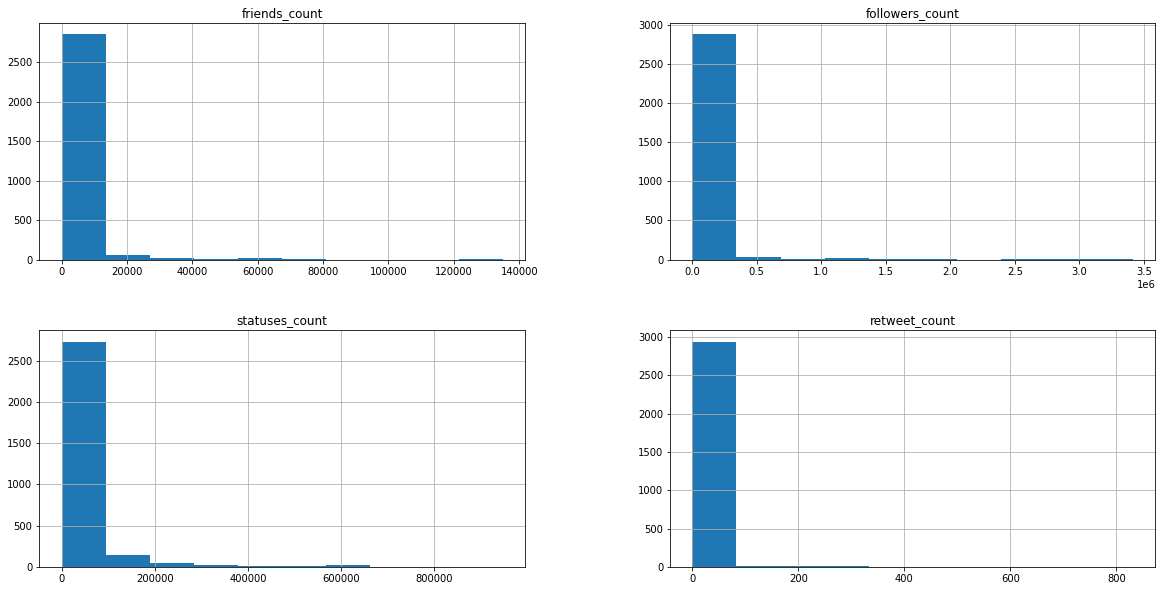

In [17]:
# plotting histograms to visualize patterns in the data

crime_df = crime_df.copy(deep=True)

# plotting histograms
crime_df.hist(figsize = (20,10))
plt.show()

The histograms seem to be unimodal.

In [18]:
# new data frame with split value columns
new = crime_df["location"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
crime_df["Town name"]= new[0]
  
# making separate last name column from new data frame
crime_df["Country"]= new[1]
  
# Dropping old Name columns
#crime_df.drop(columns =["Name"], inplace = True)
  

In [19]:
# new data frame with split value columns
new = crime_df["Town name"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
crime_df["Town_name"]= new[0]
  
# making separate last name column from new data frame
crime_df["Country_name"]= new[1]
  

In [20]:
# dropp extra columns
crime_df.drop(['Town name','Country'],axis=1,inplace=True)

In [21]:
crime_df.head()

,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label,Town_name,Country_name
0,MuchangiNyaga5,@MathareSJustice @wanjirunjira @UhaiWetu @gach...,"Nairobi, Kenya",NaN,37,0,2,8/17/2021 8:59,0,[],police brutality,Nairobi,None
1,jmkariuki24,It is not easy being a young person in this co...,"Nairobi, Kenya",Evidence enthusiast with a passion for advanci...,8979,12175,276,8/17/2021 8:52,0,[],police brutality,Nairobi,None
2,FlavionsKimani,"You come to voters begging for votes, yet none...",Nairobi Kenya,"MUFC die hard,Opinions are my own #mufcfan,#mu...",1310,1561,66764,8/17/2021 8:48,0,[],police brutality,Nairobi,Kenya
3,nyamu_dickson,It would be wise if we have bloggers with cont...,"Nairobi, Kenya","Love politics, sportsman (martial arts&footbal...",356,338,2578,8/17/2021 7:45,0,[],police brutality,Nairobi,None
4,prings_ke,"Before you vote, ask your candidates what they...","Thika, Kenya","Love one, love all.",382,1926,2529,8/17/2021 7:44,3,[],police brutality,Thika,None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

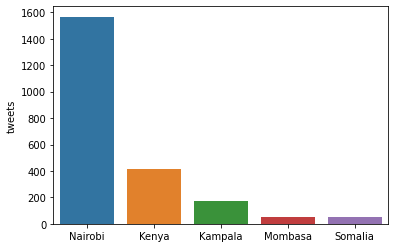

In [22]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our
x= crime_df.Town_name.value_counts(ascending=False).iloc[:5]
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

Most tweets were from Nairobi,Kenya

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

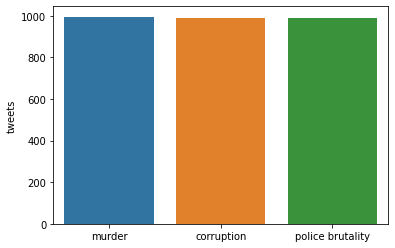

In [23]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our
x=crime_df.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

The ratio of the classes is considerable, our dataset seems to be well balanced.

In [24]:
# remove url from our data
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

crime_df['tweet']=crime_df['tweet'].apply(lambda x : remove_URL(x))

In [26]:
#removing all the panctuation marks in 'text' column
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
crime_df['tweet']=crime_df['tweet'].apply(lambda x : remove_punct(x))    

In [27]:
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
    

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [32]:
crime_df['tweet'] = crime_df['tweet'].apply(lambda x: stopword(x))

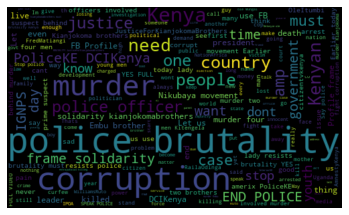

In [33]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in crime_df['tweet']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#save whole dataset
crime_df.to_csv("crime_eda.csv",index=False)
